# Insurance Premium Analysis
---
Name: Crystal Pamela Ben 

## 1. Cleaning Data
---

Note: I made some changes to the data to make it more 'dirty' to show that I can clean it. I hope it is alright. Some changes includes, add blanks, and spacing infront of the words as well as duplicates. 

In [472]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gp
import plotly.express as px
import sqlite3
from pandas.io import sql
from pandasql import sqldf

%matplotlib inline

In [233]:
# Load the data.

Insurance_pre = (r'C:\Users\cryst\OneDrive\Desktop\Smart Academy Capstone\insurance.csv')

df = pd.read_csv(Insurance_pre)
df.head()

,age of policy holder,sex,bmi,children,smoker,region,premium charges to policy
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [234]:
# Renaming columns 

column_names = ['Age','Sex','BMI','Children','Smoker','Region','Premium Charges']

df = pd.read_csv(Insurance_pre, names=column_names, skiprows=1)
df.head()               

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1339 non-null   int64  
 1   Sex              1339 non-null   object 
 2   BMI              1339 non-null   float64
 3   Children         1334 non-null   float64
 4   Smoker           1339 non-null   object 
 5   Region           1339 non-null   object 
 6   Premium Charges  1339 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.4+ KB


In [236]:
df.isnull().sum()

Age                0
Sex                0
BMI                0
Children           5
Smoker             0
Region             0
Premium Charges    0
dtype: int64

In [237]:
# Show records with null 

Null_Children = df['Children'].isnull()
df[Null_Children].head()

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges
10,60,female,25.840,NaN,no,northwest,28923.13692
11,25,male,26.220,NaN,no,northeast,2721.32080
32,18,female,26.315,NaN,no,northeast,2198.18985
51,18,female,35.625,NaN,no,northeast,2211.13075
66,19,female,28.900,NaN,no,southwest,1743.21400


In [238]:
# Replace null in Children to 0

Null_Children = df['Children'].isnull()
df.loc[Null_Children, 'Children'] = 0

In [239]:
df.isnull().any()

Age                False
Sex                False
BMI                False
Children           False
Smoker             False
Region             False
Premium Charges    False
dtype: bool

In [240]:
# Looking at the unique values 

Unique_Age = df['Age'].unique()
print(sorted(Unique_Age))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 190]


In [241]:
Outlier_age = df['Age'] == 190
df[Outlier_age].head()

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges
16,190,male,24.6,1.0,no,southwest,1837.237


In [242]:
# Change outlier 190 to 19 in Age 

df.loc[Outlier_age, 'Age'] = 19

In [243]:
Unique_Sex = df['Sex'].unique()
print(sorted(Unique_Sex))

['  female', '  male', ' female', 'female', 'male']


In [244]:
# trim the spacing before and after words 

df['Sex'] = df['Sex'].str.strip()

In [245]:
Unique_Sex = df['Sex'].unique()
print(sorted(Unique_Sex))

['female', 'male']


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1339 non-null   int64  
 1   Sex              1339 non-null   object 
 2   BMI              1339 non-null   float64
 3   Children         1339 non-null   float64
 4   Smoker           1339 non-null   object 
 5   Region           1339 non-null   object 
 6   Premium Charges  1339 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.4+ KB


In [247]:
# Check for duplicates 

#duplicate = df[df.duplicated(subset=['Premium Charges'])]
df[df.duplicated(keep=False)]

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges
9,60,female,25.84,0.0,no,northwest,28923.13692
10,60,female,25.84,0.0,no,northwest,28923.13692
196,19,male,30.59,0.0,no,northwest,1639.56310
582,19,male,30.59,0.0,no,northwest,1639.56310


In [248]:
# Remove duplicates from original dataframe

df.drop_duplicates(inplace=True)

In [249]:
df.duplicated().sum()

0

In [250]:
# Round Premium Charges to 2 decimal & BMI to 1 decimal

np.round(df['Premium Charges'], decimals = 2)
np.round(df['BMI'], decimals = 1)

df = df.round({"BMI":1,"Premium Charges":2})
df.head(5)

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges
0,19,female,27.9,0.0,yes,southwest,16884.92
1,18,male,33.8,1.0,no,southeast,1725.55
2,28,male,33.0,3.0,no,southeast,4449.46
3,33,male,22.7,0.0,no,northwest,21984.47
4,32,male,28.9,0.0,no,northwest,3866.86


In [251]:
# Create new columns based on BMI

conditions = [ (df['BMI'] < 18.5), 
                (df['BMI'] >= 18.5) & (df['BMI'] < 25),
                (df['BMI'] >= 25) & (df['BMI'] < 30),
                (df['BMI'] >= 30) & (df['BMI'] < 35),
                (df['BMI'] >= 35) & (df['BMI'] < 40),
                (df['BMI'] >= 40) ]

values = ['Underweight','Healthy','Overweight','Class 1 Obesity', 'Class 2 Obesity', 'Class 3 Obesity' ]

df['Weight Category'] = np.select(conditions, values)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Premium Charges,Weight Category
0,19,female,27.9,0.0,yes,southwest,16884.92,Overweight
1,18,male,33.8,1.0,no,southeast,1725.55,Class 1 Obesity
2,28,male,33.0,3.0,no,southeast,4449.46,Class 1 Obesity
3,33,male,22.7,0.0,no,northwest,21984.47,Healthy
4,32,male,28.9,0.0,no,northwest,3866.86,Overweight


## 2. Python Data Visualisation
---

### HeatMap 

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. From the heatmap below, the relationship between BMI of policy holder and the number of children they have has no correlation. Additionally, there is a weak positive correlation between Age and Premium charged to policy holder.  

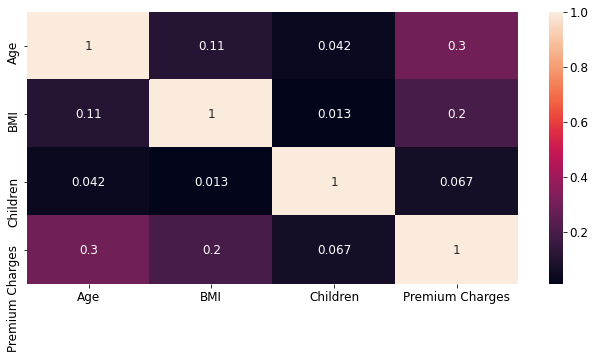

In [275]:
fig, ax = plt.subplots(figsize=(11, 5))
insurance_correlations = df.corr()
sns.heatmap(insurance_correlations,annot = True,annot_kws={'fontsize': 12,});

### Scatter Plot

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. From the scatter plot below, it shows that there is a relatively gentle increase in premium charged as age increase. 

Text(0.5, 0.98, 'Correlation between BMI and Premium Charges')

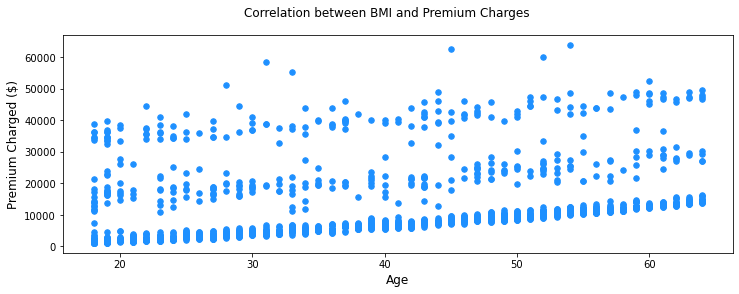

In [464]:
df.plot(x='Age', y='Premium Charges', kind='scatter', color='dodgerblue',\
        figsize=(12,4), s=30);

#plt.rcParams['font.size'] = '10'
plt.xlabel('Age', fontsize=12)
plt.ylabel('Premium Charged ($)', fontsize=12)
plt.suptitle('Correlation between BMI and Premium Charges', fontsize=12)

### Bar Chart

The purpose of a bar graph is to convey relational information quickly in a visual manner. The bars display the value for a particular category of data. From the bar chart below, it shows that smokers have to by a higher premium on average as opposed to non smokers. The difference in average premium is about 24k. 

In [317]:
AvgCharges = df[['Premium Charges' , 'Smoker']].groupby('Smoker').mean()
AvgCharges.head()

,Premium Charges
Smoker,
no,8440.660310
yes,32050.231898


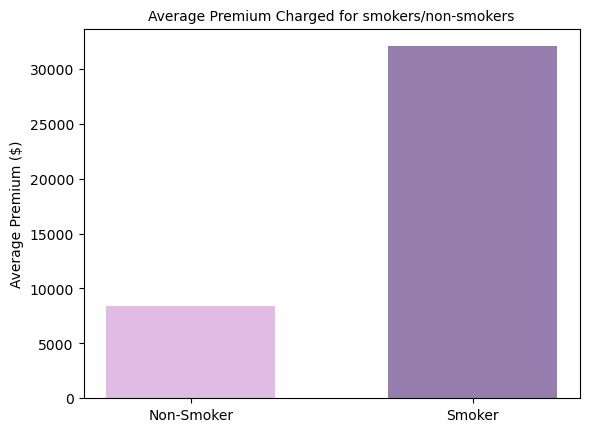

In [332]:
bars=('Non-Smoker','Smoker')
y_pos = np.arange(len(bars))
width = [0.6,0.6]

plt.rcdefaults()

plt.bar(
    x=np.arange(AvgCharges.size), width=width,
    height=AvgCharges['Premium Charges'],  color=['#E0BBE4', '#957DAD']
)

plt.title('Average Premium Charged for smokers/non-smokers', fontsize='10')
plt.ylabel('Average Premium ($)')
plt.xticks(y_pos, bars, color='black', rotation=360, fontsize='10')
plt.show()

### Horizontal Bar Chart

After adding a new column which separates the BMI by categories, we can see that policy holders who are obese generally have to pay a higher premium. On the other hand, individuals who are within the healthy or underweight category pay a lower premium. Possible reason for this is that people with obesity are more likely to develop a number of potentially serious health problems, including: Heart disease and strokes. As they are at higher risk of health related issues, insurance companies would charge higher fees to cover potential claims.

In [465]:
AvgCharges_weight = df[['Premium Charges' , 'Weight Category']].groupby('Weight Category').mean()
AvgCharges_weight.head(6)

,Premium Charges
Weight Category,
Class 1 Obesity,14331.553876
Class 2 Obesity,17226.632775
Class 3 Obesity,16707.659783
Healthy,10379.499685
Overweight,11000.079203
Underweight,8852.201000


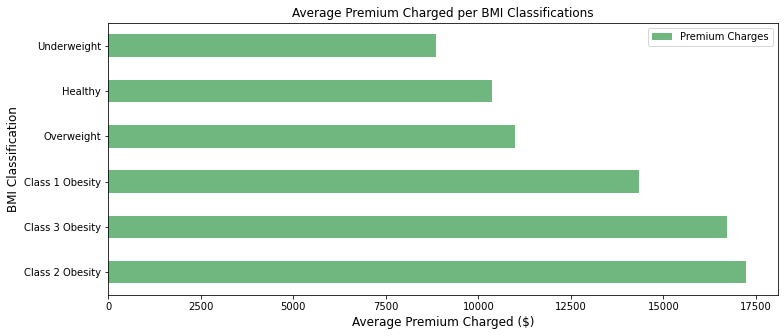

In [463]:
Sort_AvgCharges_weight = AvgCharges_weight.sort_values('Premium Charges', ascending=False)

Sort_AvgCharges_weight.plot(kind='barh',figsize=(12,5),color=['#6fb77e'])
plt.title('Average Premium Charged per BMI Classifications', fontsize=12)
plt.ylabel('BMI Classification', fontsize=12)
plt.xlabel('Average Premium Charged ($)', fontsize=12)
plt.grid(False)
plt.show()

### Pie Chart

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. The chart belows shows the total premium charged by region. From this pie chart, the southeast region yields the highest premium charged. While the other region has a consistent percentage of around 23% of total premium charged. 

<AxesSubplot:title={'center':'Total Premium Charged by Region'}, ylabel='Premium Charges'>

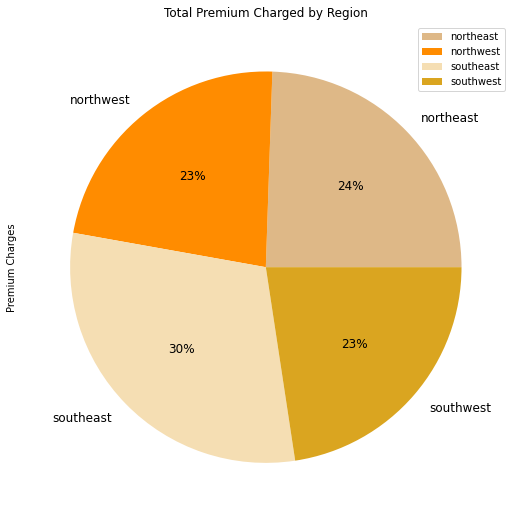

In [461]:
df.groupby(['Region']).sum().plot(kind='pie', y='Premium Charges', autopct='%1.0f%%',
                                colors = ['burlywood', 'darkorange', 'wheat','goldenrod'],
                                title='Total Premium Charged by Region', figsize=(9, 9), textprops={'fontsize': 12})



## 3. SQL 
---

In [ ]:
#bottom 5 premium 
#avg premium base on gender?

In [485]:
# Renaming columns to remove spaces 

df.columns = ['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Premium_Charges',
       'Weight_Category']

In [486]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Premium_Charges',
       'Weight_Category'],
      dtype='object')

### Top 5 premium charged to policy holders

In [498]:
q1 = """
    SELECT Age, Sex, BMI, Smoker, Premium_Charges, Weight_Category
    FROM df
    ORDER BY Premium_Charges DESC
    LIMIT 5;
    """

In [499]:
output1 = sqldf(q1)
output1

,Age,Sex,BMI,Smoker,Premium_Charges,Weight_Category
0,54,female,47.4,yes,63770.43,Class 3 Obesity
1,45,male,30.4,yes,62592.87,Class 1 Obesity
2,52,male,34.5,yes,60021.40,Class 1 Obesity
3,31,female,38.1,yes,58571.07,Class 2 Obesity
4,33,female,35.5,yes,55135.40,Class 2 Obesity


### Average premium charged for each weight category 

In [540]:
q2 = """
    SELECT AVG(Premium_Charges) As AverageCharges, Weight_Category
    FROM df
    GROUP BY Weight_Category
    ORDER BY AverageCharges DESC;
    """

In [541]:
output2 = sqldf(q2)
output2

,AverageCharges,Weight_Category
0,17226.632775,Class 2 Obesity
1,16707.659783,Class 3 Obesity
2,14331.553876,Class 1 Obesity
3,11000.079203,Overweight
4,10379.499685,Healthy
5,8852.201000,Underweight


### Average premium charged smoker vs non-smoker

In [542]:
q3 = """
    SELECT AVG(Premium_Charges) As AverageCharges, Smoker
    FROM df
    GROUP BY Smoker
    ORDER BY AverageCharges DESC;
    """

In [543]:
output3 = sqldf(q3)
output3

,AverageCharges,Smoker
0,32050.231898,yes
1,8440.660310,no


### Avereage premium for healthy and non smoking individual

In [570]:
q4 = """
    SELECT Weight_Category, Smoker, AVG(Premium_Charges) as Average_Charges
    FROM df
    WHERE Weight_Category = 'Healthy' AND Smoker = 'no';
    """

In [571]:
output4 = sqldf(q4)
output4

,Weight_Category,Smoker,Average_Charges
0,Healthy,no,7599.638198


### Premium charges for each age group

In [590]:
q5 = """
    SELECT AVG(Premium_Charges) as Average_Charges,
    CASE 
        WHEN Age < 25 THEN 'Age < 25'
        WHEN Age BETWEEN 25 AND 40 THEN 'Age 25 - 40'
        WHEN Age BETWEEN 41 AND 60 THEN 'Age 41 - 60'
        ELSE 'Age > 60'
    END AS Age_Group
    FROM df
    GROUP BY Age_Group
    ORDER BY Average_Charges;
    """

In [591]:
output5 = sqldf(q5)
output5

,Average_Charges,Age_Group
0,9037.953321,Age < 25
1,11013.387352,Age 25 - 40
2,15888.757637,Age 41 - 60
3,21063.163297,Age > 60
